In [30]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train_flatten = x_train.reshape(len(x_train), -1).astype('float16') / 255.0
x_test_flatten = x_test.reshape(len(x_test), -1).astype('float16') / 255.0

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(784,)))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='sigmoid', ))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(x_train_flatten, y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9899 - loss: 0.0346
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9909 - loss: 0.0298
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9922 - loss: 0.0273
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9923 - loss: 0.0246
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9941 - loss: 0.0214
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9939 - loss: 0.0200
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9954 - loss: 0.0161
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9954 - loss: 0.0155
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9956 - loss: 0.0153
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9964 - loss: 0.0133
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9964 - loss: 0.0121
Epoch 12/15
1875/1875 ━━━━━━━━

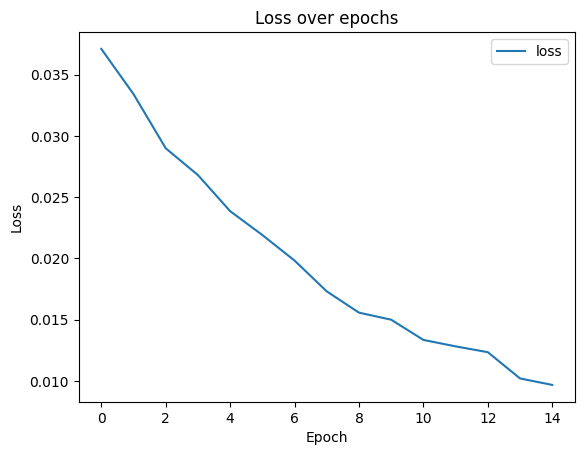

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


np.int64(2)

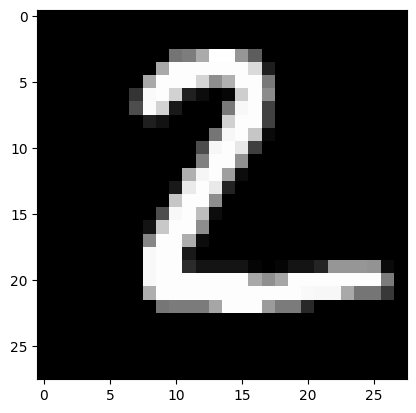

In [ ]:
plt.imshow(x_test[1], cmap='gray')
y_pred = model.predict(x_test_flatten)
np.argmax(y_pred[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step


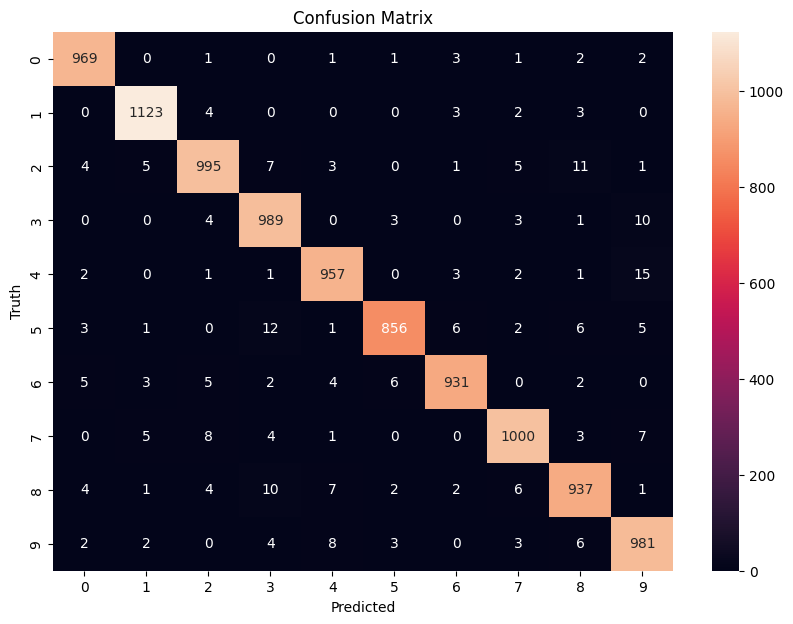

In [31]:
y_pred = model.predict(x_test_flatten)
y_pred_labels = [np.argmax(y) for y in y_pred]
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()